# EP3 PMR3508 - Classifiers for the Adult Dataset

Nusp: 13686685

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adult_train = pd.read_csv('train_data.csv')
adult_test = pd.read_csv('test_data.csv')

adult_train.shape, adult_test.shape

((32560, 16), (16280, 15))

## Understanding the data

In [3]:
adult_train.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [4]:
adult_train.tail()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32555,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32556,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32557,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32558,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K
32559,48839,47,Local-gov,203067,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K


In [5]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       32560 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      32560 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  32560 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


Categorical: workclass, education, marital.status, occupation, relationship, race, sex, native.country

Numerical: age, fnlwgt, education.num, capital.gain, capital.loss

obs: apparently there is no null values

In [6]:
adult_train.drop('Id', axis=1).describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Target

<=50K: 24719 (75.92%)


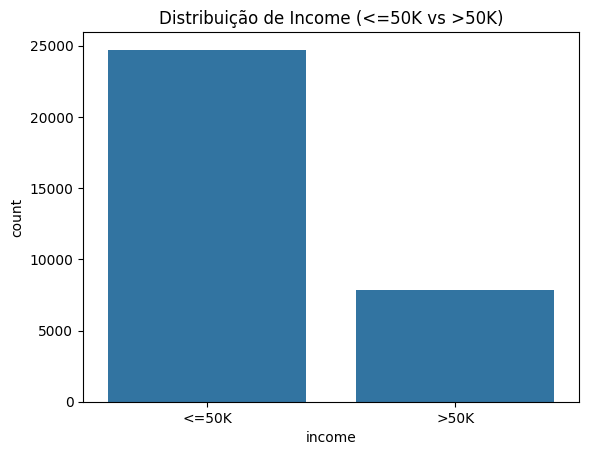

In [7]:
less50 = adult_train['income'].value_counts().iloc[0]
more50 = adult_train['income'].value_counts().iloc[1]

print(f'<=50K: {less50} ({(less50 / adult_train.shape[0]) * 100:.2f}%)')

sns.countplot(x='income', data=adult_train)
plt.title('Distribuição de Income (<=50K vs >50K)')
plt.show()

Target variable is unbalanced. 

### Native country

In [8]:
adult_train["native.country"].value_counts()

native.country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

Data here is very unbalanced. It is going to be handled in data preparation

### Education

In [9]:
adult_train[['education', 'education.num']].value_counts()

education     education.num
HS-grad       9                10501
Some-college  10                7291
Bachelors     13                5354
Masters       14                1723
Assoc-voc     11                1382
11th          7                 1175
Assoc-acdm    12                1067
10th          6                  933
7th-8th       4                  646
Prof-school   15                 576
9th           5                  514
12th          8                  433
Doctorate     16                 413
5th-6th       3                  333
1st-4th       2                  168
Preschool     1                   51
Name: count, dtype: int64

Question: what information education.num give us?

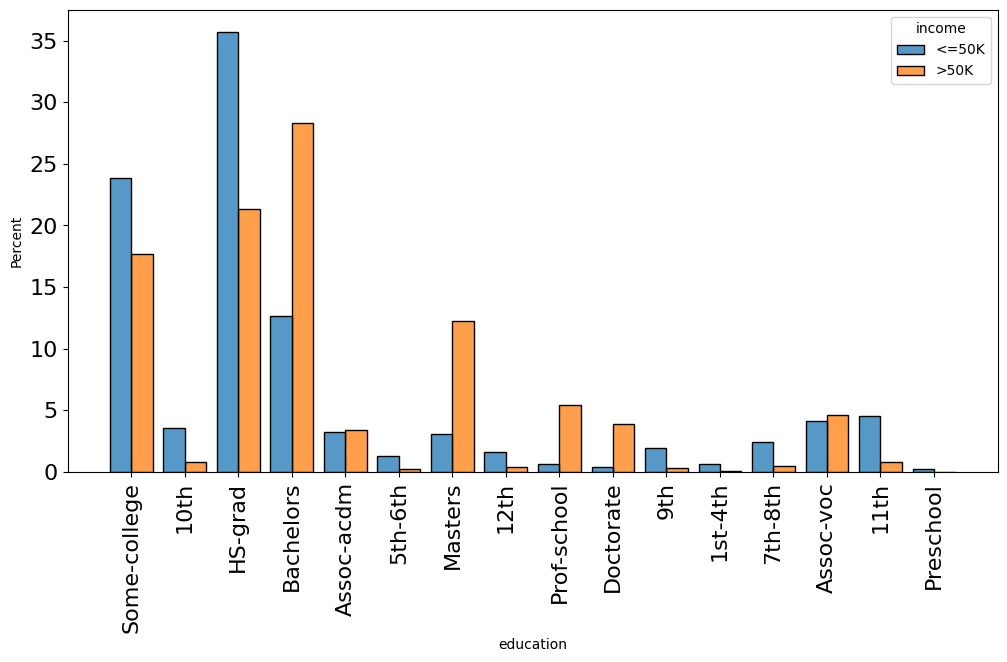

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(x = adult_train['education'], hue=adult_train['income'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

We can see that both 'education' and 'education.num' represent the same information. Hence, we can drop the 'education' column, since education.num is numerical and gives us an ordinal encoding

### Labor features

In [11]:
adult_train[['workclass']].value_counts()

workclass       
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [12]:
adult_train[adult_train.isin(['?']).any(axis=1)]

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
23,16303,26,Private,153078,HS-grad,9,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,80,?,>50K
33,16313,48,?,185291,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,6,United-States,<=50K
35,16315,30,?,138744,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
52,16332,70,?,54849,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,20,United-States,>50K
60,16340,58,?,178660,12th,8,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,48798,18,?,80564,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,60,United-States,<=50K
32525,48805,41,Private,169104,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
32539,48819,49,?,202874,HS-grad,9,Separated,?,Unmarried,White,Female,0,0,40,Columbia,<=50K
32543,48823,21,?,107801,Some-college,10,Never-married,?,Own-child,White,Female,0,0,3,United-States,<=50K


Clearly there is a symbol denotating a null value. It is possible to see that it happens in others columns. When in 'workclass', it is also in 'occupation' (as expected), but also may appears in other columns. So, let's replace "?" for nan value

In [13]:
adult_train = adult_train.replace('?', np.nan)
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       30724 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      30717 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  31977 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [14]:
adult_train[adult_train['occupation'].isnull() & ~adult_train['workclass'].isnull()]

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4474,20754,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
5392,21672,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
6966,23246,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
13904,30184,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
25390,41670,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
26939,43219,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
28977,45257,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K


It makes sense, because if the person has never worked, it can not have an occupation

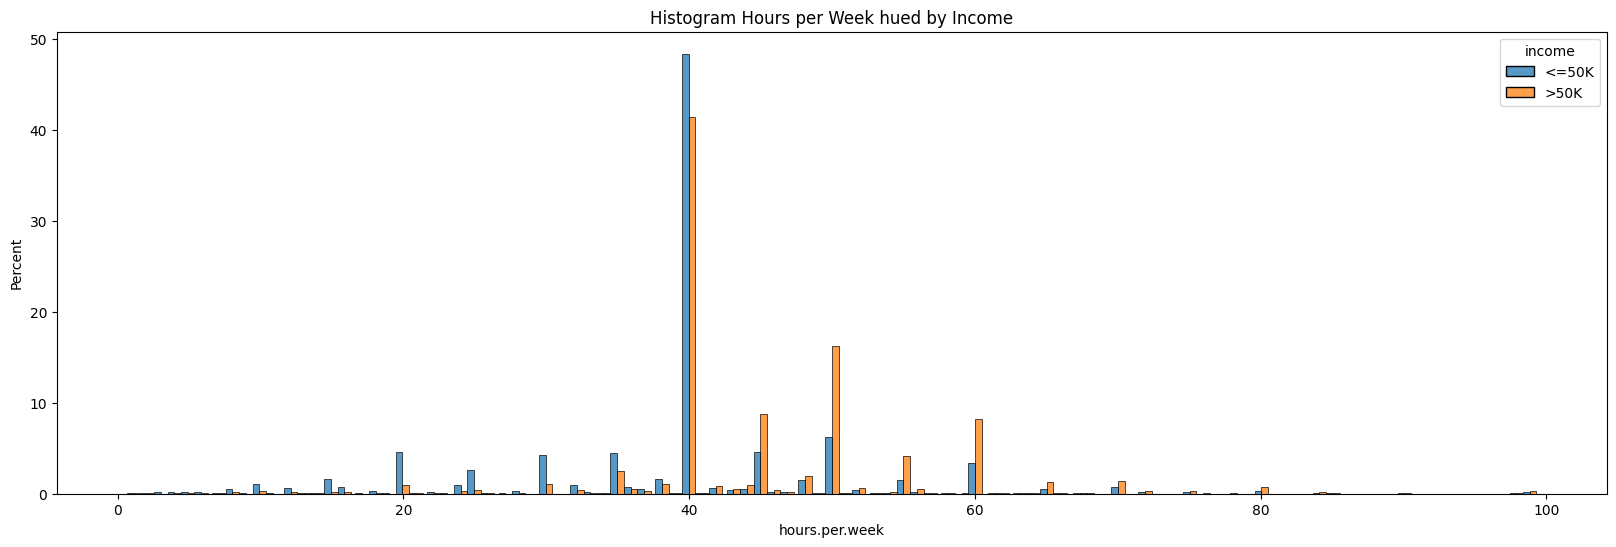

In [15]:
plt.figure(figsize=(20,6))
sns.histplot(x = adult_train['hours.per.week'], hue=adult_train['income'], multiple='dodge', stat = 'percent', shrink = 3, common_norm=False)
plt.title('Histogram Hours per Week hued by Income')
plt.show()


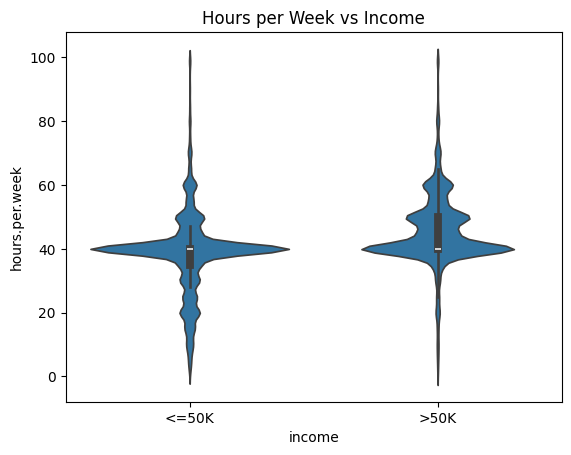

In [16]:
sns.violinplot(x='income', y='hours.per.week', data=adult_train)
plt.title('Hours per Week vs Income')
plt.show()

In [17]:
adult_train["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

Let's see the 'occupation' and 'workclass' distribution

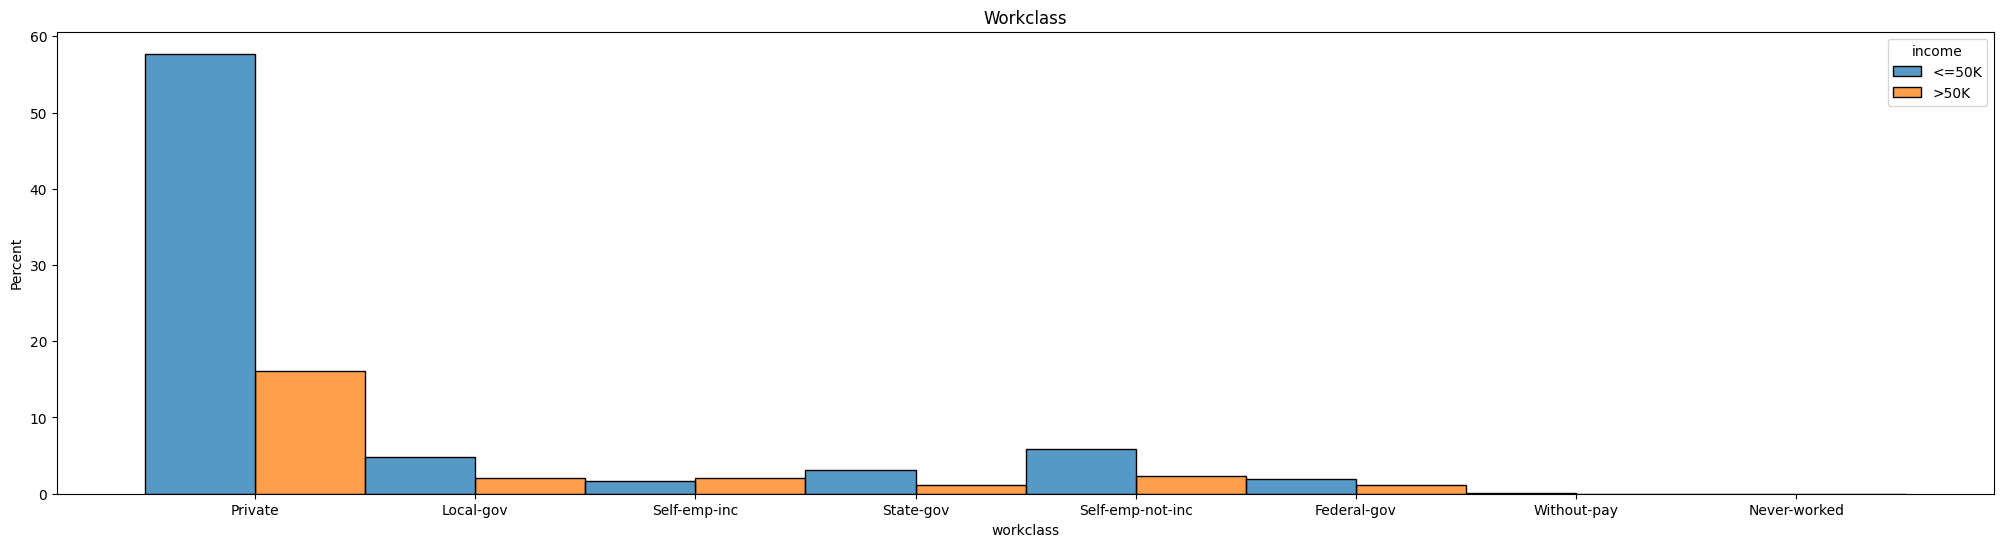

In [18]:
plt.figure(figsize=(25,6),dpi=100)
sns.histplot(data=adult_train, x="workclass",multiple="dodge", kde=False, stat='percent', hue='income')
plt.title('Workclass')
plt.show()


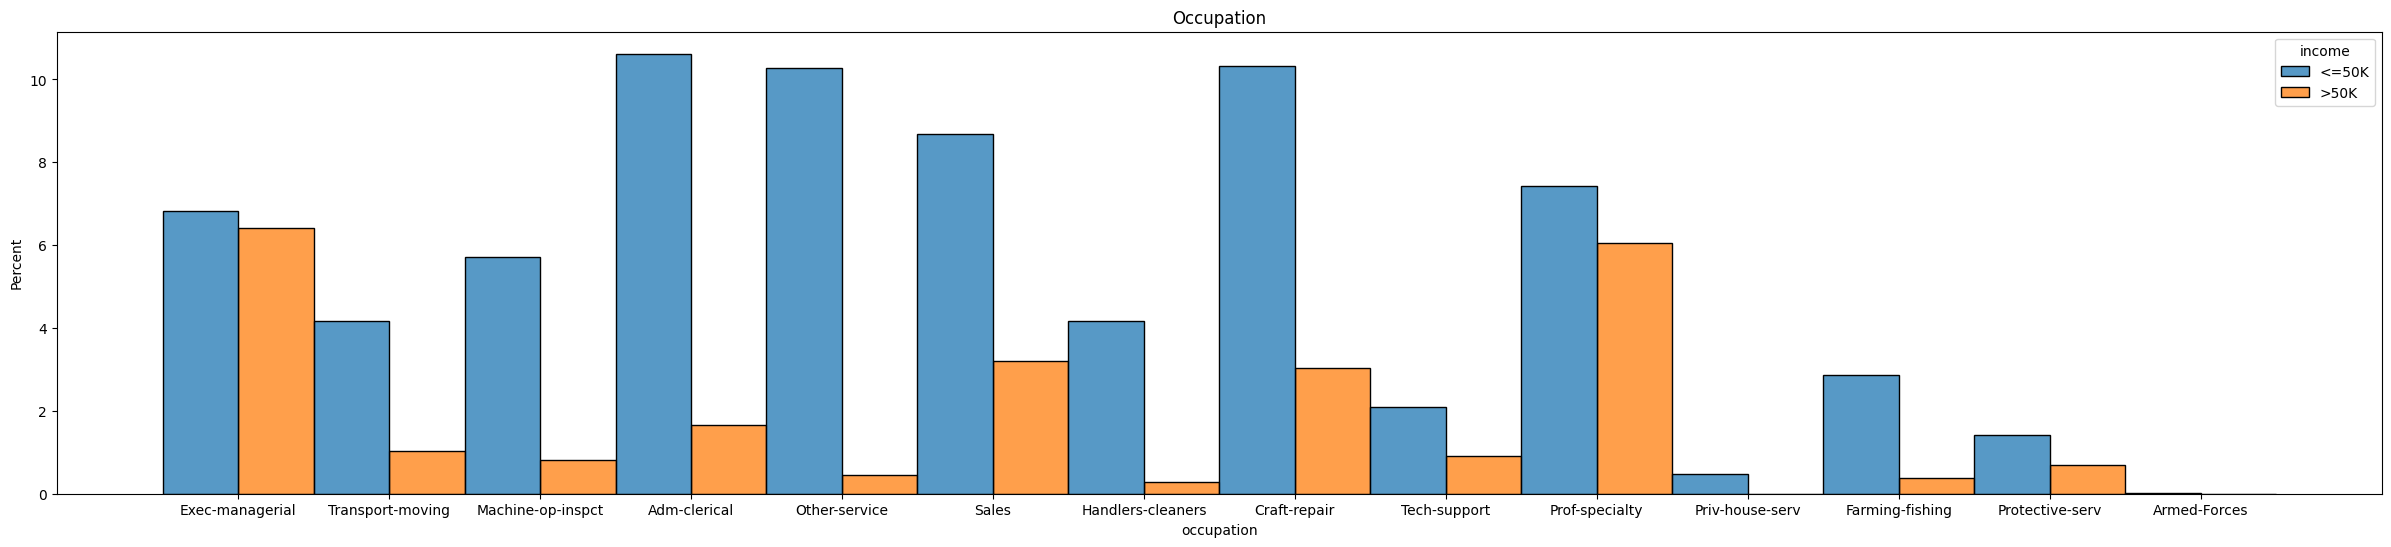

In [19]:
plt.figure(figsize=(30,6),dpi=100)
sns.histplot(data=adult_train, x="occupation",multiple="dodge", kde=False, stat='percent', hue='income')
plt.title('Occupation')
plt.show()


The data in both 'ocupation' and 'workclass' are very sparse: we'll handle this in data preparation 

### Gender

Gender analysis

In [20]:
adult_train["sex"].value_counts()

sex
Male      21789
Female    10771
Name: count, dtype: int64

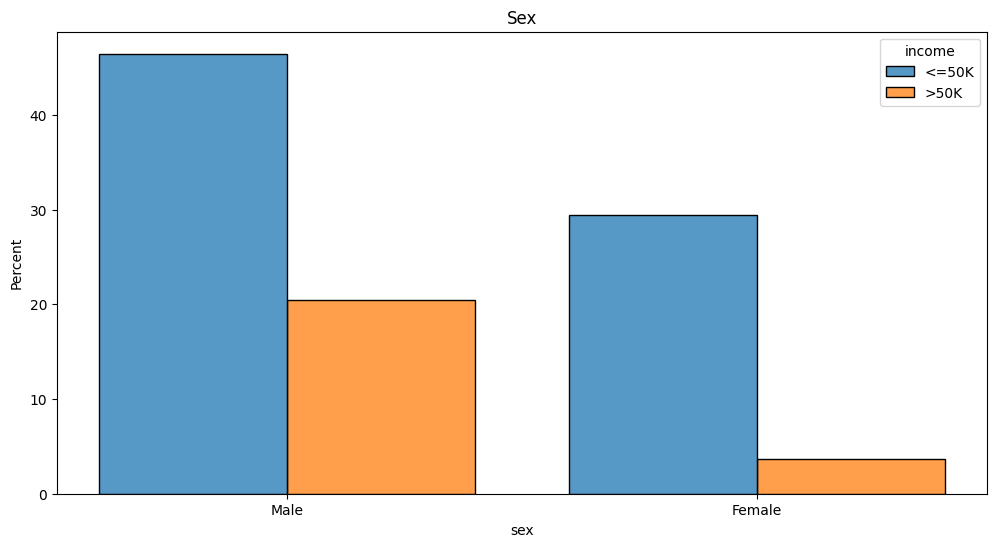

In [21]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=adult_train, x="sex",multiple="dodge", shrink=0.8,  kde=False, stat='percent', hue='income')
plt.title('Sex')
plt.show()

Even though we have an ethical situation, the data show us that males tends to have higher incomes.

### Race

In [22]:
adult_train["race"].value_counts()

race
White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

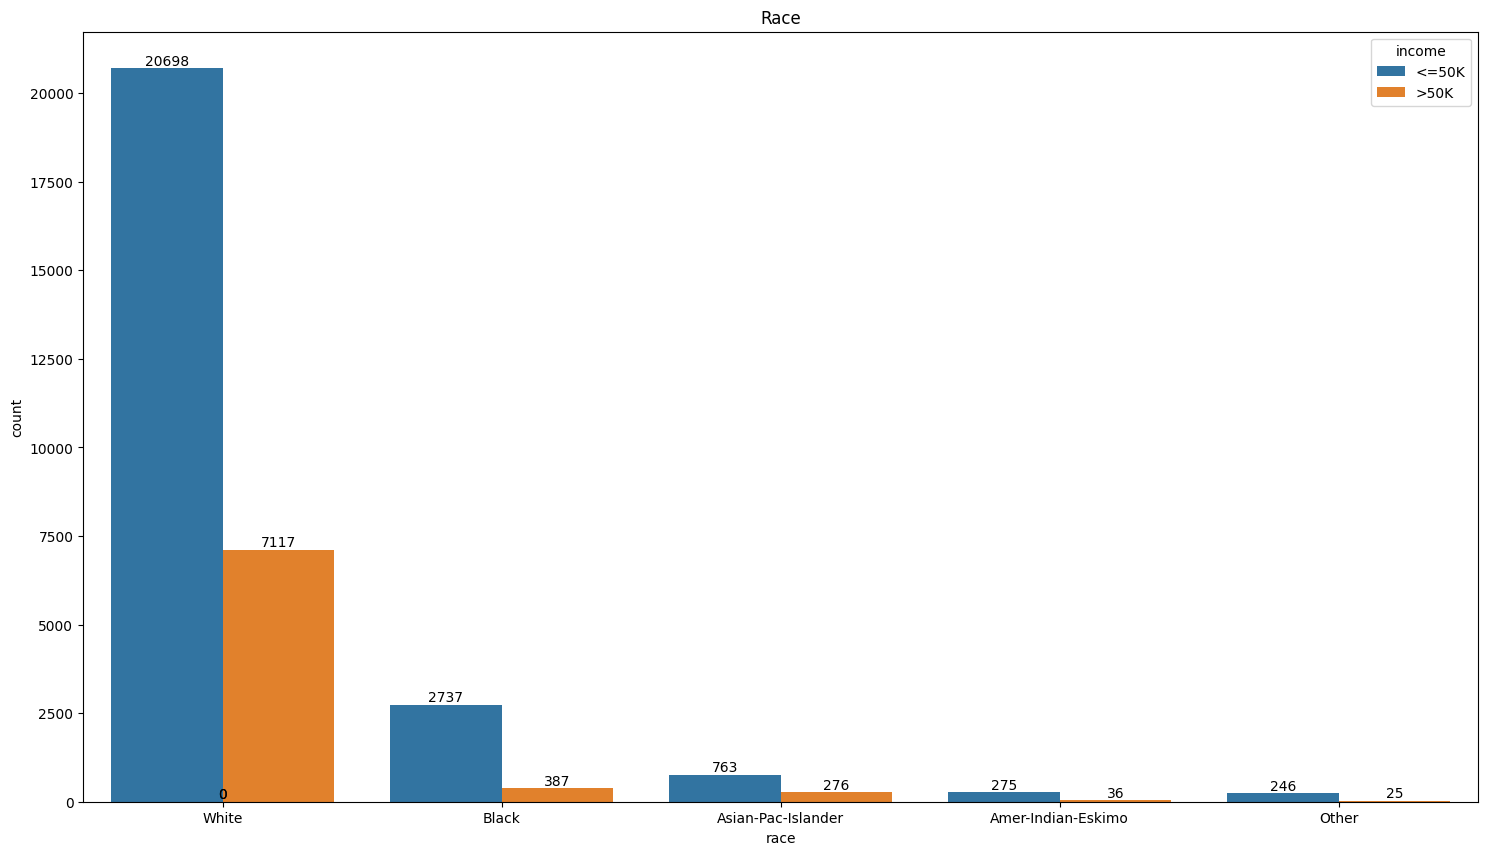

In [23]:
plt.figure(figsize=(18,10),dpi=100)
ax=sns.countplot(x='race',  hue='income', data=adult_train)
plt.title('Race')
for p in ax.patches:
    height = p.get_height()  
    ax.text(
        p.get_x() + p.get_width()/2, 
        height,  
        '{:.0f}'.format(height),  
        ha="center", 
        va="bottom"  
    )

plt.show()

Just like in gender section, the data show us that the percentage of white individuals with income >50k is higher than in other groups. 

### Capital gain/loss

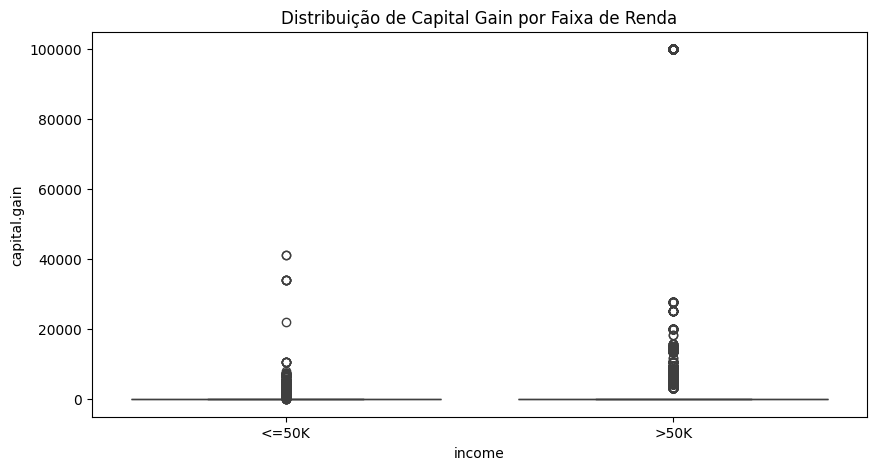

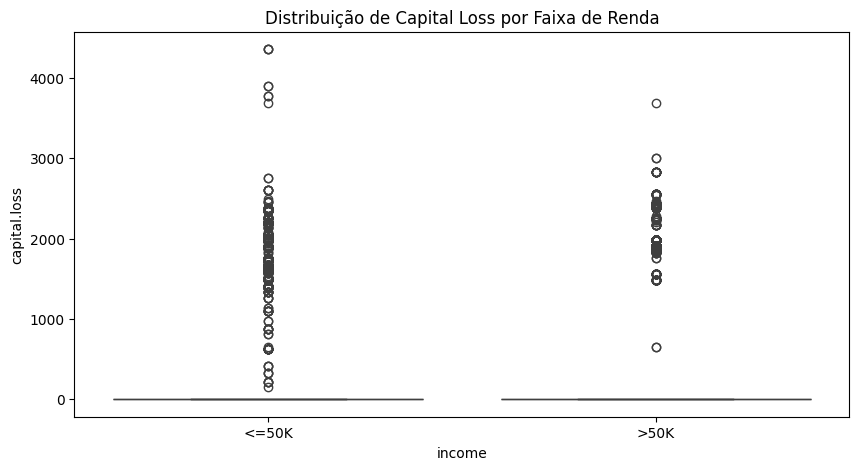

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='income', y='capital.gain', data=adult_train)
plt.title('Distribuição de Capital Gain por Faixa de Renda')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='income', y='capital.loss', data=adult_train)
plt.title('Distribuição de Capital Loss por Faixa de Renda')
plt.show()

We can observe the presence of outlier data. Let's remove them to visualize

In [25]:
iqr_loss = adult_train['capital.loss'].quantile(0.75) - adult_train['capital.loss'].quantile(0.25)
iqr_gain = adult_train['capital.gain'].quantile(0.75) - adult_train['capital.gain'].quantile(0.25)

iqr_loss, iqr_gain

(0.0, 0.0)

In [26]:
sup_loss_outliers = adult_train[adult_train['capital.loss'] > adult_train['capital.loss'].quantile(0.75) + iqr_loss * 1.5]
inf_loss_outliers = adult_train[adult_train['capital.loss'] > adult_train['capital.loss'].quantile(0.75) - iqr_loss * 1.5]

sup_gain_outliers = adult_train[adult_train['capital.gain'] > adult_train['capital.gain'].quantile(0.75) + iqr_gain * 1.5]
inf_gain_outliers = adult_train[adult_train['capital.gain'] > adult_train['capital.gain'].quantile(0.75) - iqr_gain * 1.5]

print(f'percetange of loss outliers: {(inf_loss_outliers.shape[0] + sup_loss_outliers.shape[0]) / adult_train.shape[0] * 100:.2f}%')
print(f'percetange of gain outliers: {(inf_gain_outliers.shape[0] + sup_gain_outliers.shape[0]) / adult_train.shape[0] * 100:.2f}%')

percetange of loss outliers: 9.33%
percetange of gain outliers: 16.65%


Diferentiating if a person has already invested might be a good feature. Will see that later

### "Personal" features

In [27]:
adult_train["relationship"].value_counts()

relationship
Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

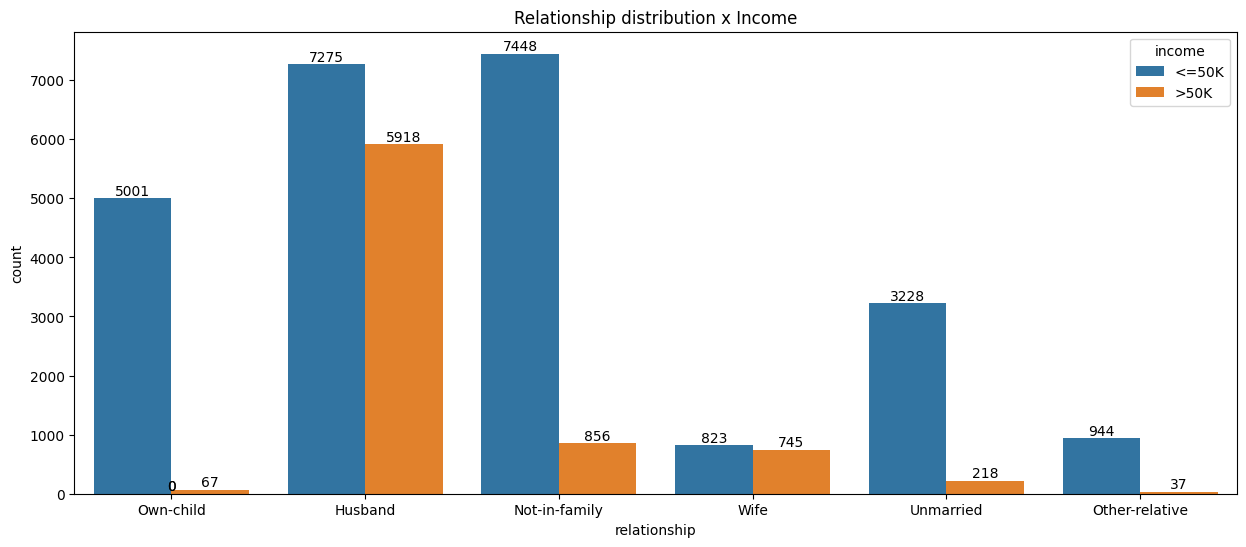

In [28]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='relationship', hue='income', data=adult_train)
plt.title('Relationship distribution x Income')

for p in ax.patches:
    height = p.get_height()  
    ax.text(
        p.get_x() + p.get_width()/2, 
        height,  
        '{:.0f}'.format(height),  
        ha="center", 
        va="bottom"  
    )
plt.show()

In [29]:
adult_train["marital.status"].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

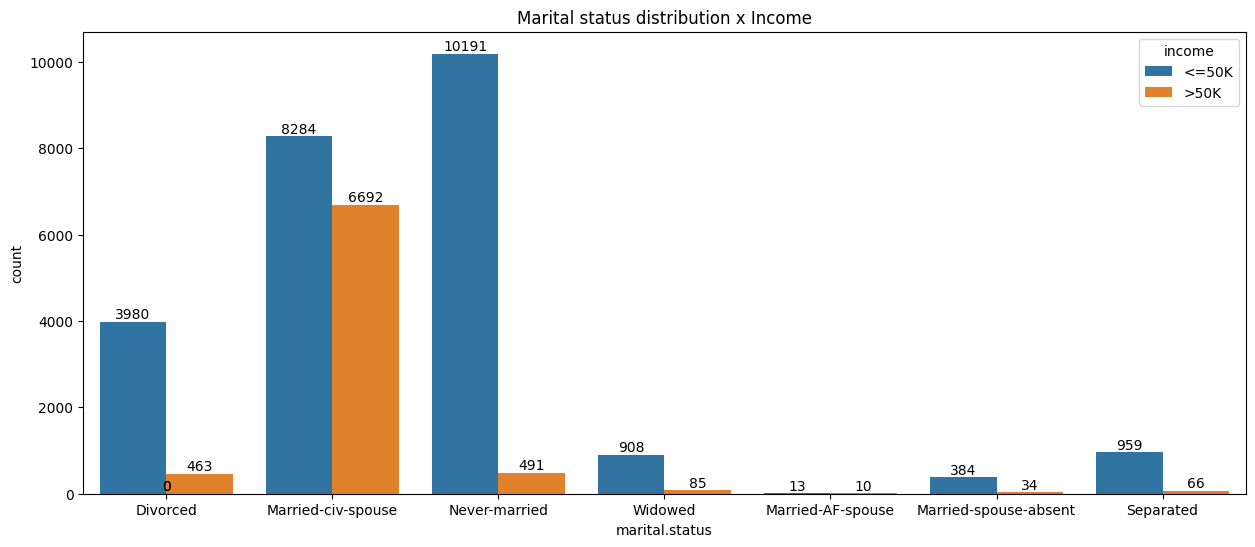

In [30]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='marital.status', hue='income', data=adult_train)
plt.title('Marital status distribution x Income')


for p in ax.patches:
    height = p.get_height()  
    ax.text(
        p.get_x() + p.get_width()/2, 
        height,  
        '{:.0f}'.format(height),  
        ha="center", 
        va="bottom"  
    )
plt.show()

In [31]:
divorced = 463/(3980+463)
married_civ = 6692/(8284+6692)
never_married = 491/(10191+491)
widowed = 85/(85+908)
married_af = 10/(10+13)
married_spouse = 34/(34+384)
separated = 66/(66+959)
print('Divorced =', f'{divorced:.2f}', 
      '\nMarried civ =', f'{married_civ:.2f}', 
      '\nNever married =', f'{never_married:.2f}', 
      '\nWidowed =', f'{widowed:.2f}', 
      '\nMarried AF =', f'{married_af:.2f}', 
      '\nMarried spouse =', f'{married_spouse:.2f}', 
      '\nSeparated =', f'{separated:.2f}')



Divorced = 0.10 
Married civ = 0.45 
Never married = 0.05 
Widowed = 0.09 
Married AF = 0.43 
Married spouse = 0.08 
Separated = 0.06


Individuals with 'married-civ-spouse' status are significantly more likely to earn an income >50k. However, the high percentage of 'married-af-spouse' should be interpreted with caution, as the sample size is too small to draw meaningful conclusions.

More generally, the two charts above show us that individuals who start a family tend to have higher incomes.

In [32]:
adult_train["age"].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: count, Length: 73, dtype: int64

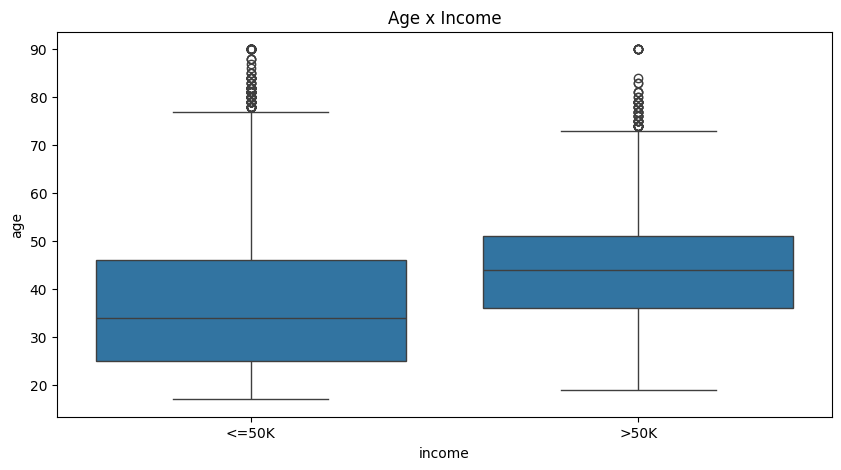

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='income', y='age', data=adult_train)
plt.title('Age x Income')
plt.show()

We can observe a trend that older individuals are more likely to have an income >50k, which also makes sense considering that the longer a career, the higher the income tends to be.

<Axes: xlabel='income', ylabel='fnlwgt'>

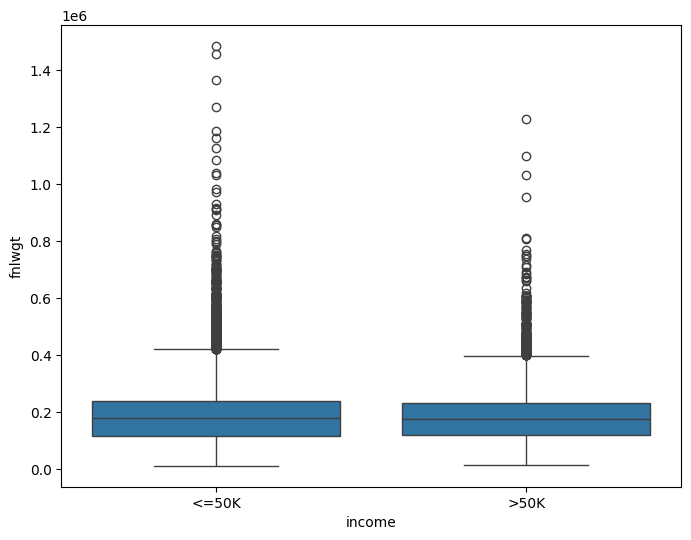

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='fnlwgt', data=adult_train)

No trend is observed here.

### EDA between numerical features

Correlation analysis between numerical features

In [35]:
num_vars = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss']
corr_matrix = adult_train[num_vars].corr()

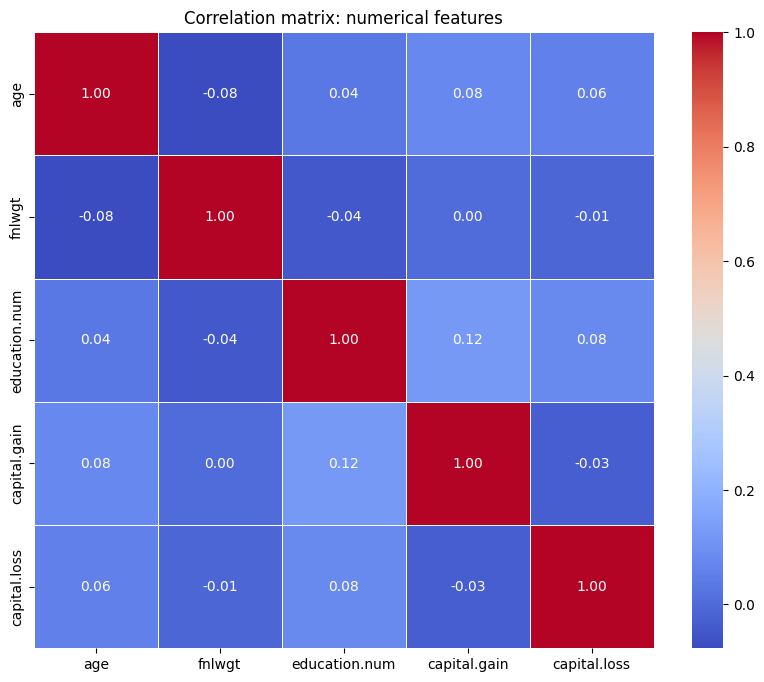

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix: numerical features')
plt.show()

No strong correlation, wich might be a  good thing, because the features can contribute with more information to the classifier 

In [ ]:
plt.figure(figsize=(12,12))
sns.pairplot(adult_train, hue='income',palette="viridis")
plt.show()

We already knew that numerical variables didn't have strong correlation, and we can observe the same behavior with other variabels. The charts have diferent shapes with no clear direction.

## Data preparation

After analysing data, let's make the transformations before training the classifier

In [38]:
adult_train.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [39]:
X = adult_train.drop(columns=['income', 'Id'], axis=1)
y = adult_train['income'].map({'<=50K': 0, '>50K': 1})

## Pre-processing

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.dummy import DummyClassifier

In [41]:
# Droping education column because it is already being represented by education.num
X = X.drop(columns=['education'])

In [42]:
# Separating in train and validation, proportion is 80:20 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y ,random_state=1)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((26048, 13), (6512, 13), (26048,), (6512,))

In [ ]:
# safely create binary columns and remove originals
def create_binary_column(df, col):
    if col in df.columns:
        df[f'{col}_binary'] = (df[col] != 0).astype(int)
        return df.drop(columns=[col])
    return df  

# apply logarithmic transformation
def apply_log(df):
    if 'fnlwgt' in df.columns:
        df['fnlwgt_log'] = np.log1p(df['fnlwgt']) 
        return df.drop(columns=['fnlwgt'])
    return df  

# transform native.country
def transform_native_country(df):
    if 'native.country' in df.columns:
        df['is_us'] = (df['native.country'] == 'United-States').astype(int)
        return df.drop(columns=['native.country'])
    return df  

# Preprocessor for numerical columns
numeric_features = ['age', 'fnlwgt', 'education.num', 'hours.per.week']
numeric_transformer = Pipeline(steps=[
    ('binary_capital_gain', FunctionTransformer(create_binary_column, kw_args={'col': 'capital.gain'}, validate=False)),
    ('binary_capital_loss', FunctionTransformer(create_binary_column, kw_args={'col': 'capital.loss'}, validate=False)),
    ('log_fnlwgt', FunctionTransformer(apply_log, validate=False)),
    ('scaler', StandardScaler())
])

# Preprocessor for categorical columns
categorical_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use the most frequent category to fill missing values
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Removes one column to avoid multicollinearity
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('native_country', FunctionTransformer(transform_native_country, validate=False), ['native.country']),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


X_train_processed = pipeline.fit_transform(X_train)

print("Processed Data Sample:")
print(X_train_processed[:1])

Processed Data Sample:
  (0, 0)	1.0
  (0, 1)	0.32783998597116004
  (0, 2)	-0.4167738836212687
  (0, 3)	3.207391958690485
  (0, 4)	0.5571879924646481
  (0, 7)	1.0
  (0, 13)	1.0
  (0, 28)	1.0
  (0, 39)	1.0
  (0, 40)	1.0


Data stored in Compressed Sparse ROW (CSR) format, used for sparse matrices.

Example:
- (0, 0) 1.0:
    - Row 0, Column 0, Value 1.0.
- (0, 1) -0.11542936059961963:
    - Row 0, Column 1, Value -0.11542936059961963.


## Training models

In this section, four models (MLPClassifier, Random Forest, Gradient Boosting Classifier, and XGBoost) are trained using the training dataset, with a hyperparameter search performed to identify the optimal configuration for each model.

In [44]:
# Metrics for evaluation
scoring = {
    "precision": make_scorer(precision_score, pos_label=1, average="binary"),
    "recall": make_scorer(recall_score, pos_label=1, average="binary"),
    "f1": make_scorer(f1_score, pos_label=1, average="binary"),
    "roc_auc": make_scorer(roc_auc_score, needs_proba=True)
}

results=[]
trained_models = []

c:\Users\Apple\venvs\PoliJunior\obramax\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


The evaluation metrics used to assess the performance of the models include "precision," "recall," "F1-score," and "ROC AUC." Among these, "ROC AUC" is chosen as the primary metric because it provides a balanced measure of a model's ability to distinguish between classes, even in the presence of imbalanced data. By considering both sensitivity (true positive rate) and specificity (false positive rate), "ROC AUC" offers a good evaluation of the classifier's overall performance.

In [45]:
def train_and_evaluate(model, param_distributions, X_train, y_train, scoring=None, cv=5, refit_metric="roc_auc", n_iter=50, random_state=42):
    """
    Train and evaluate a model using RandomizedSearchCV and cross-validation.

    Parameters:
    - model: The model to train (e.g., LogisticRegression(), RandomForestClassifier()).
    - param_distributions: Dictionary of hyperparameters for RandomizedSearchCV.
    - X_train: Training features.
    - y_train: Training target.
    - scoring: Scoring metrics for RandomizedSearchCV (default is None, which uses a predefined dictionary).
    - cv: Number of cross-validation folds (default is 5).
    - refit_metric: Metric to optimize during RandomizedSearchCV (default is "roc_auc").
    - n_iter: Number of parameter settings sampled (default is 50).
    - random_state: Random state for reproducibility (default is 42).

    Returns:
    - result: Dictionary containing model name, best parameters, best score, cross-validation scores, and standard deviation.
    - best_model: Trained model instance with the best hyperparameters.
    """
    if scoring is None:
        scoring = {
            "precision": make_scorer(precision_score, pos_label=1, average="binary"),
            "recall": make_scorer(recall_score, pos_label=1, average="binary"),
            "f1": make_scorer(f1_score, pos_label=1, average="binary"),
            "roc_auc": make_scorer(roc_auc_score, needs_proba=True)
        }

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        scoring=scoring,
        refit=refit_metric,
        n_iter=n_iter,
        cv=cv,
        verbose=2,
        random_state=random_state
    )
    random_search.fit(X_train, y_train)
    
    # Cross-validation
    best_model = random_search.best_estimator_
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring=refit_metric)
    
    # Result summary
    result = {
        "Model": type(model).__name__,
        "Best Parameters": random_search.best_params_,
        "Best Score (ROC AUC)": random_search.best_score_,
        "Cross-Validation Mean Score": cv_scores.mean(),
        "Cross-Validation Std Dev": cv_scores.std()
    }
    
    # Return result and best_model
    return result, best_model

### Baseline


In [46]:
dummy_clf = DummyClassifier(strategy="stratified") 
dummy_clf.fit(X_train_processed, y_train)

y_pred = dummy_clf.predict(X_train_processed)

cv_scores = cross_val_score(dummy_clf, X_train_processed, y_train, cv=5, scoring="roc_auc")

precision = precision_score(y_train, y_pred, average='binary', zero_division=0)
recall = recall_score(y_train, y_pred, average='binary', zero_division=0)
f1 = f1_score(y_train, y_pred, average='binary', zero_division=0)
roc_auc = roc_auc_score(y_train, dummy_clf.predict_proba(X_train_processed)[:, 1])

print(f"Dummy Classifier Performance:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC (Cross-Validation Mean): {cv_scores.mean()}")


Dummy Classifier Performance:
Precision: 0.24401606425702813
Recall: 0.24214889207715606
F1-Score: 0.24307889262281965
ROC AUC (Cross-Validation Mean): 0.5024487629281122


### MLPClassifier

In [ ]:
model = MLPClassifier(max_iter=1000, random_state=1)

param = {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "activation": ["relu", "tanh", "logistic"],
        "solver": ["adam", "sgd"],
        "alpha": [0.0001, 0.001, 0.01],
        "learning_rate_init": [0.001, 0.01, 0.1]
        }

result, best_model = train_and_evaluate(model, param, X_train_processed, y_train, scoring, cv=3, n_iter=3)
results.append(result)
trained_models.append((result["Model"], best_model))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, solver=adam; total time=  30.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, solver=adam; total time=  33.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate_init=0.01, solver=adam; total time=  36.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=  58.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=  58.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time= 1.0min
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.1, solver=sgd; total time=  11.9s
[CV] END activation=logistic, alpha=0.001, hidden_la

### Random Forest

In [49]:
model = RandomForestClassifier(random_state=1)

param =  {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced", "balanced_subsample"]
    }

result, best_model = train_and_evaluate(model, param, X_train_processed, y_train, scoring, cv=3, n_iter=5)
results.append(result)
trained_models.append((result["Model"], best_model))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END class_weight=balanced_subsample, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   6.1s
[CV] END class_weight=balanced_subsample, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   6.2s
[CV] END class_weight=balanced_subsample, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   6.7s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  35.2s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  35.5s
[CV] END class_weight=None, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  34.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END class_weight=balanced, max_depth=10, min_samp

### GradientBoostingClassifier

In [48]:
model = GradientBoostingClassifier(random_state=1)

param = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": np.linspace(0.01, 0.5, 10),
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
    }

result, best_model = train_and_evaluate(model, param, X_train_processed, y_train, scoring, cv=3, n_iter=20)
results.append(result)
trained_models.append((result["Model"], best_model))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=0.17333333333333334, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  34.1s
[CV] END learning_rate=0.17333333333333334, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  34.4s
[CV] END learning_rate=0.17333333333333334, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  33.4s
[CV] END learning_rate=0.2822222222222222, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END learning_rate=0.2822222222222222, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.2822222222222222, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END learning_rate=0.33666666666666667, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  34

### XGBoost

In [47]:
model = XGBClassifier(random_state=1, use_label_encoder=False)

param = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": np.linspace(0.01, 0.5, 10),
    "max_depth": [3, 5, 7, 10],
    "scale_pos_weight": [1, 5, 10],
    "subsample": np.linspace(0.5, 1.0, 5),
    "colsample_bytree": np.linspace(0.5, 1.0, 5)
    }

result, best_model = train_and_evaluate(model, param, X_train_processed, y_train, scoring, cv=5, n_iter=60)
results.append(result)
trained_models.append((result["Model"], best_model))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END colsample_bytree=0.875, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.875, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.875, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.875, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.875, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.17333333333333334, max_depth=7, n_estimators=100, scale_pos_weight=5, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.17333333333333334, max_depth=7, n_estimators=100, 

### Results

In [83]:
results_df = pd.DataFrame(results)

results_df

,Model,Best Parameters,Best Score (ROC AUC),Cross-Validation Mean Score,Cross-Validation Std Dev
0,XGBClassifier,"{'subsample': 1.0, 'scale_pos_weight': 1, 'n_e...",0.928016,0.928016,0.004389
1,GradientBoostingClassifier,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.925153,0.925153,0.001523
2,RandomForestClassifier,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.916916,0.916916,0.001538
3,MLPClassifier,"{'solver': 'adam', 'learning_rate_init': 0.01,...",0.881858,0.881858,0.002771


In [84]:
def evaluate_on_validation(best_models, X_valid, y_valid):
    """
    Evaluate each model on the validation set using the trained model instances.

    Parameters:
    - best_models: List of tuples (model name, trained model instance).
    - X_valid: Validation set features.
    - y_valid: Validation set target.

    Returns:
    - validation_results_df: DataFrame with validation results for each model.
    """
    validation_results = []
    
    for model_name, model in best_models:
        y_pred = model.predict(X_valid)
        if hasattr(model, "predict_proba"):  # Check if model supports predict_proba
            y_proba = model.predict_proba(X_valid)[:, 1]
        else:
            y_proba = None

        precision = precision_score(y_valid, y_pred, zero_division=0)
        recall = recall_score(y_valid, y_pred, zero_division=0)
        f1 = f1_score(y_valid, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_valid, y_proba) if y_proba is not None else None

        validation_results.append({
            "Model": model_name,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "ROC AUC": roc_auc
        })

        print(f"Classification Report for {model_name}:\n")
        print(classification_report(y_valid, y_pred, zero_division=0))
        print("\n" + "="*50 + "\n")
    
    validation_results_df = pd.DataFrame(validation_results)
    return validation_results_df


best_models = [(row["Model"], row["Best Parameters"]) for _, row in results_df.iterrows()]

# Evaluate on validation set
X_valid_processed = pipeline.transform(X_valid)
validation_results_df = evaluate_on_validation(trained_models, X_valid_processed, y_valid)

validation_results_df

Classification Report for XGBClassifier:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4944
           1       0.79      0.66      0.72      1568

    accuracy                           0.88      6512
   macro avg       0.84      0.80      0.82      6512
weighted avg       0.87      0.88      0.87      6512



Classification Report for GradientBoostingClassifier:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4944
           1       0.80      0.66      0.72      1568

    accuracy                           0.88      6512
   macro avg       0.85      0.81      0.82      6512
weighted avg       0.87      0.88      0.87      6512



Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4944
           1       0.79      0.61      0.69      1568

    accuracy                  

,Model,Precision,Recall,F1-Score,ROC AUC
0,XGBClassifier,0.788039,0.663903,0.720665,0.930649
1,GradientBoostingClassifier,0.798313,0.663903,0.724930,0.930223
2,RandomForestClassifier,0.790774,0.612245,0.690151,0.919436
3,MLPClassifier,0.670597,0.544005,0.600704,0.890734


In this section was evaluated the performance of the trained models on the validation set using the best hyperparameters identified during the tuning. The evaluation is based on: Precision, Recall, F1-Score and ROC AUC.

Comparison between the cross_validation results obtained during hyperparameter tuning and validation set results:
- General
    - All models performed slightly better in terms of ROC AUC on the validation set compared to cross-validation, indicating good generalization
- XGBoostClassifier
    - Achieved the highest ROC AUC score of 0.9306, demonstrating its ability to effectively distinguish between classes.
    - Some points about the classification report:
        - Negative Class
            - High precision (0.90) and recall (0.94), resulting in an F1-Score of 0.92, indicating excellent handling of the majority class.
        - Positive Class
            - Reasonable precision (0.79) and recall (0.66), with an F1-Score of 0.72.
            - While the recall for the minority class is slightly lower, its precision ensures fewer false positives.
        - Weighted Average Metrics
            - Precision: 0.87, Recall: 0.88, F1-Score: 0.87
    - These results underline the model’s ability to manage class imbalance effectively.
- GradientBoostingClassifier
    - Performed nearly as well as XGBoost, with a ROC AUC of 0.9302
    - Achieved slightly higher Precision (0.7983) compared to XGBoost but showed similar recall performance, indicating comparable handling of minority and majority classes.
- RandomForestClassifier
    - Delivered a respectable ROC AUC of 0.9194 but had weaker Recall (0.6122), resulting in a lower F1-Score (0.6902) compared to the boosting models.
- MLPClassifier
    - Displayed the weakest performance with a ROC AUC of 0.8907, coupled with lower Precision (0.6706), Recall (0.5440), and F1-Score (0.6007), suggesting room for improvement.

The **XGBoostClassifier** outperformed the other models in terms of ROC AUC, demonstrating its capability to handle the dataset's characteristics effectively. Its performance consistency across validation and cross-validation further validates its reliability. 
- Its classification report highlights strong generalization to the validation set, with particularly high performance on the majority class and respectable handling of the minority class despite the class imbalance.
- Its consistency in both validation and cross-validation results solidifies its reliability for this task.

In [92]:
X_processed = pipeline.fit_transform(X)

best_model = trained_models[0][1]
best_model.fit(X_processed, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17333333333333334,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
X_test_processed = pipeline.transform(adult_test.drop(columns=['Id']))

y_pred = best_model.predict(X_test_processed)

In [98]:
df_kaggle = pd.DataFrame({'Id': adult_test['Id'], 'income': y_pred})
df_kaggle.to_csv('submission.csv', index=False)